In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('crx_original.csv', na_values=['#NAME ?'])
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,+,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0
1,+,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560
2,+,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824
3,+,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3
4,+,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    object 
 3   A4      690 non-null    float64
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    object 
 8   A9      690 non-null    float64
 9   A10     690 non-null    object 
 10  A11     690 non-null    object 
 11  A12     690 non-null    int64  
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    object 
 15  A16     690 non-null    int64  
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [4]:
data = data[data != '?']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      678 non-null    object 
 2   A3      678 non-null    object 
 3   A4      690 non-null    float64
 4   A5      684 non-null    object 
 5   A6      684 non-null    object 
 6   A7      681 non-null    object 
 7   A8      681 non-null    object 
 8   A9      690 non-null    float64
 9   A10     690 non-null    object 
 10  A11     690 non-null    object 
 11  A12     690 non-null    int64  
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     677 non-null    object 
 15  A16     690 non-null    int64  
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [5]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      653 non-null    object 
 1   A2      653 non-null    object 
 2   A3      653 non-null    object 
 3   A4      653 non-null    float64
 4   A5      653 non-null    object 
 5   A6      653 non-null    object 
 6   A7      653 non-null    object 
 7   A8      653 non-null    object 
 8   A9      653 non-null    float64
 9   A10     653 non-null    object 
 10  A11     653 non-null    object 
 11  A12     653 non-null    int64  
 12  A13     653 non-null    object 
 13  A14     653 non-null    object 
 14  A15     653 non-null    object 
 15  A16     653 non-null    int64  
dtypes: float64(2), int64(2), object(12)
memory usage: 86.7+ KB


In [6]:
#Select column with categorical data
encodecat = ['A1','A2','A5','A6','A7', 'A8','A10','A11','A13','A14']

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()

# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
data[encodecat] = data[encodecat].apply(le.fit_transform)

data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202,0
1,0,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43,560
2,0,0,24.5,0.500,1,0,10,3,1.50,1,0,0,0,0,280,824
3,0,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100,3
4,0,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120,0


In [7]:
data['A3'] = data['A3'].astype("float")
select = data.select_dtypes(include = 'object').columns
data[select] = data[select].astype("int64")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      653 non-null    int32  
 1   A2      653 non-null    int32  
 2   A3      653 non-null    float64
 3   A4      653 non-null    float64
 4   A5      653 non-null    int32  
 5   A6      653 non-null    int32  
 6   A7      653 non-null    int32  
 7   A8      653 non-null    int32  
 8   A9      653 non-null    float64
 9   A10     653 non-null    int32  
 10  A11     653 non-null    int32  
 11  A12     653 non-null    int64  
 12  A13     653 non-null    int32  
 13  A14     653 non-null    int32  
 14  A15     653 non-null    int64  
 15  A16     653 non-null    int64  
dtypes: float64(3), int32(10), int64(3)
memory usage: 61.2 KB


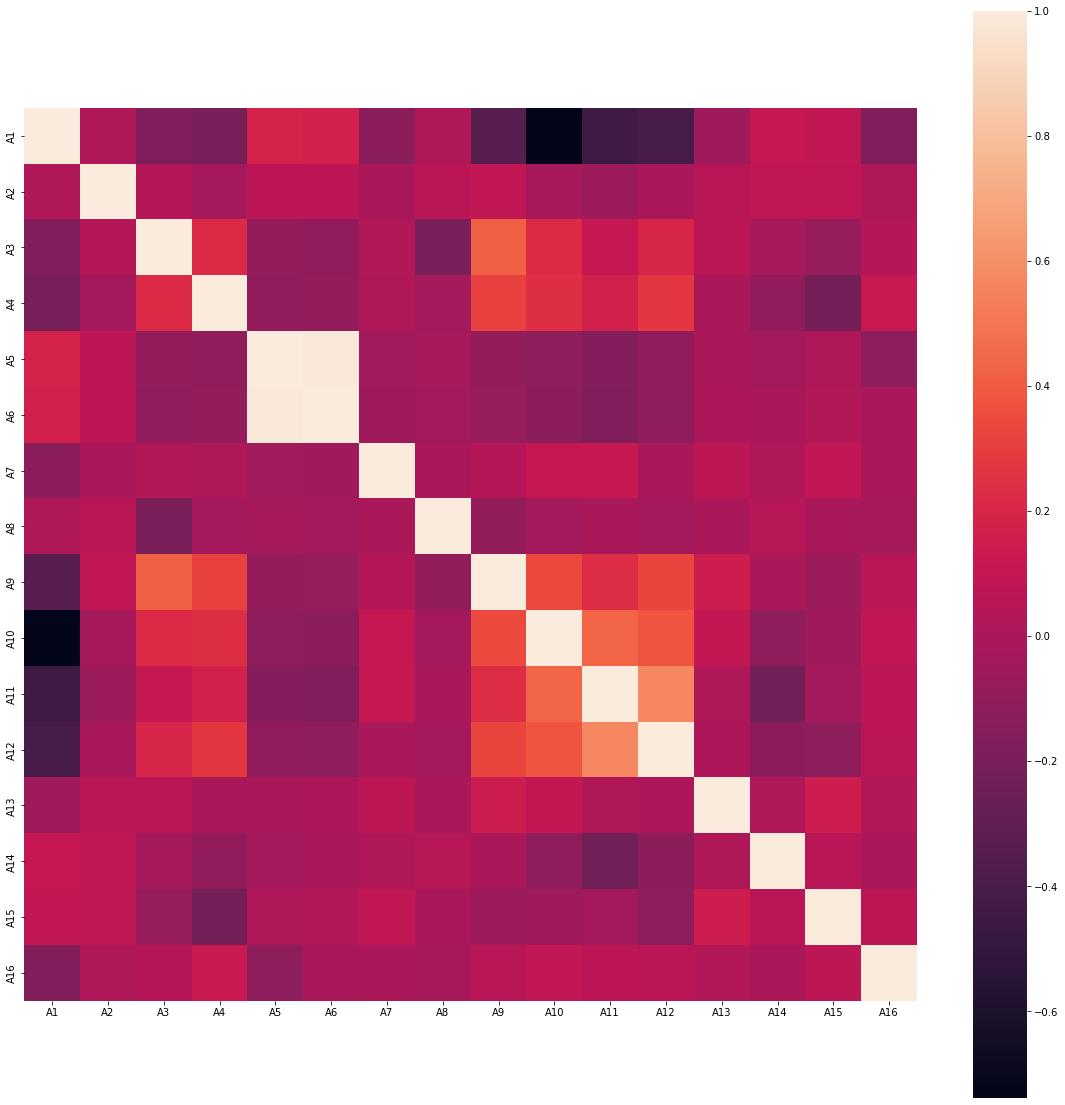

In [8]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=1, square=True);

<AxesSubplot:>

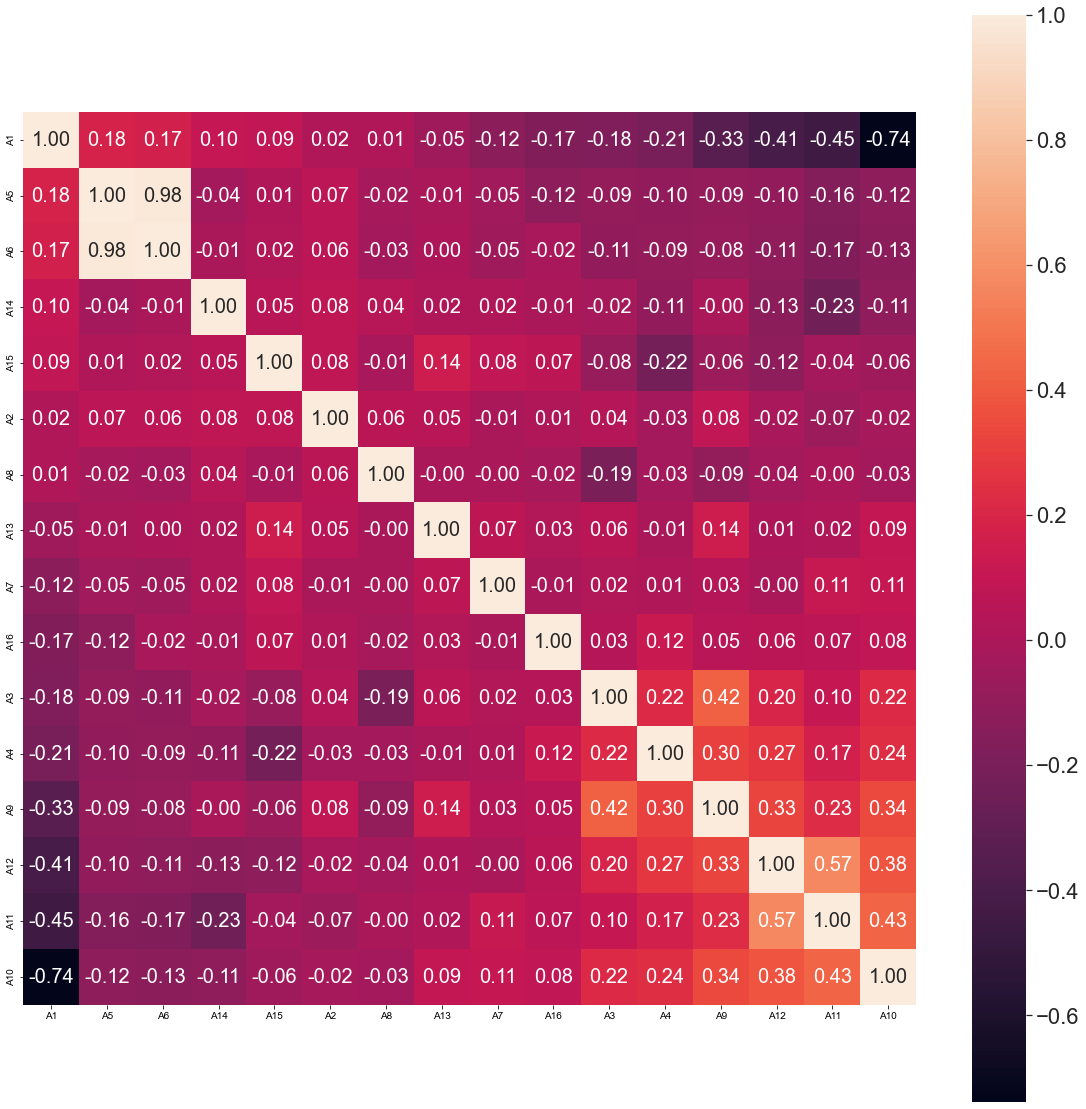

In [9]:
k = 16
cols = corrmat.nlargest(k, 'A1')['A1'].index
cm = np.corrcoef(data[cols].values.T)
f, ax = plt.subplots(figsize=(20, 20))
sns.set(font_scale=2)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols.values, xticklabels=cols.values)


In [10]:
#remove correlation coef between 0.2 to -0.2
data = data.drop(data.columns[[1,2,4,5,6,7,12,13,14,15]], axis =1)
data.head()

,A1,A4,A9,A10,A11,A12
0,0,0.000,1.25,1,1,1
1,0,4.460,3.04,1,1,6
2,0,0.500,1.50,1,0,0
3,0,1.540,3.75,1,1,5
4,0,5.625,1.71,1,0,0


In [11]:
# Note that write to location will be different
data.to_csv(r'C:\Users\WeiXian\Documents\NTU CE\CE4032\Project 2\datasets\crx_others.csv', index = None, header=True)

In [12]:
data = pd.read_csv('crx_original.csv', na_values=['#NAME ?'])
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,+,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0
1,+,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560
2,+,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824
3,+,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3
4,+,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0


In [13]:
#remove correlation coef between 0.2 to -0.2
data = data.drop(data.columns[[1,2,4,5,6,7,12,13,14,15]], axis =1)
data.head()

,A1,A4,A9,A10,A11,A12
0,+,0.000,1.25,t,t,1
1,+,4.460,3.04,t,t,6
2,+,0.500,1.50,t,f,0
3,+,1.540,3.75,t,t,5
4,+,5.625,1.71,t,f,0


In [14]:
data.to_csv(r'crx_cba.csv', index = None, header=True)